<a href="https://colab.research.google.com/github/HibaAp/Applied-Machine-Learning/blob/main/Assignment1/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   ham                                                                                                              5571 non-null   object
 1   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
  label                                           messages  length
0   ham                      Ok lar... Joking wif u oni...      29
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
2   ham  U dun say so early hor... U c already then say...      49
3   ham  Nah I don't 

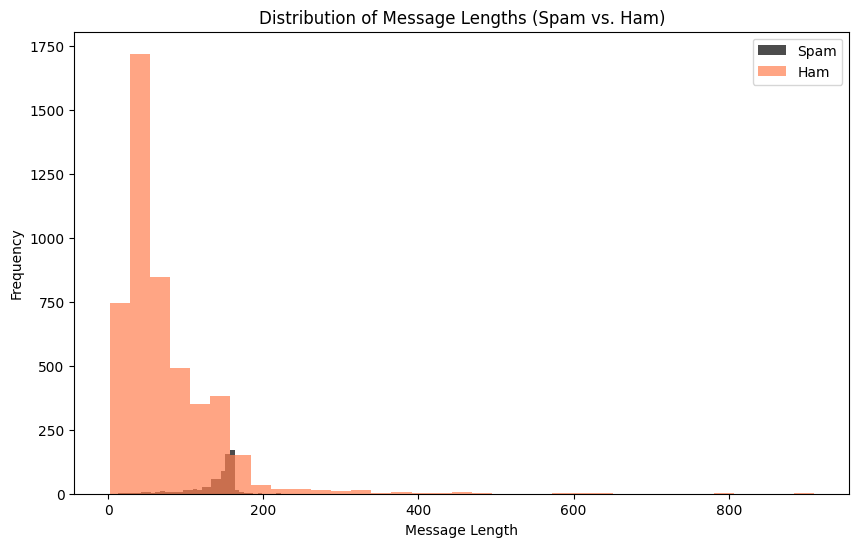

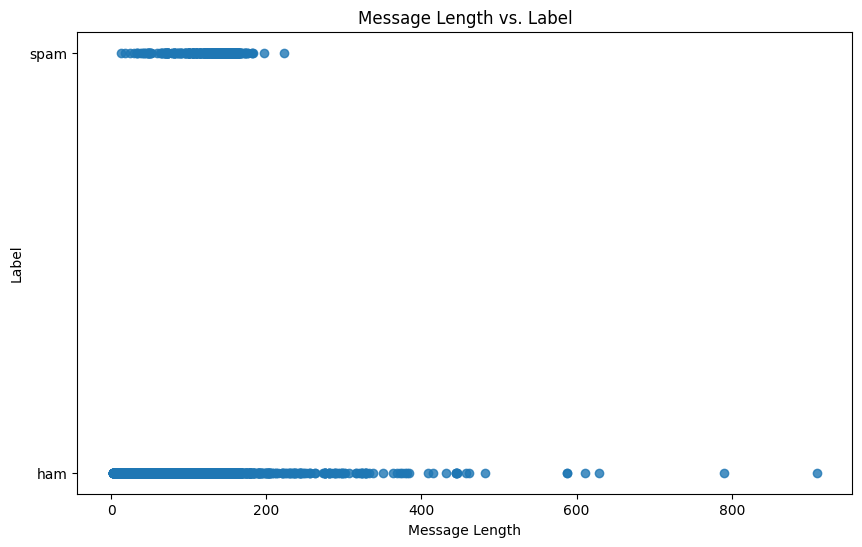

1


<Figure size 1000x600 with 0 Axes>

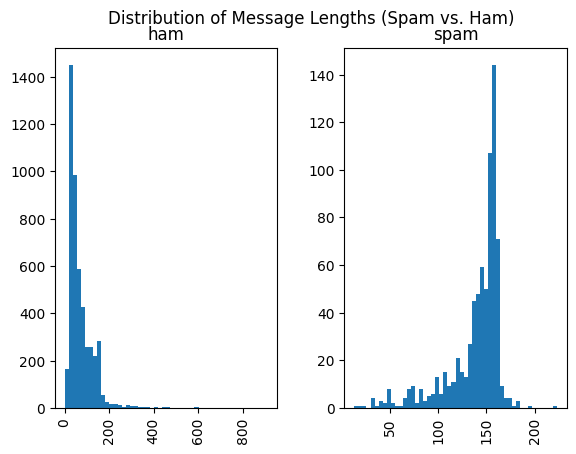

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-6-385ed90f90aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='length', y='label', inner='box', palette='Dark2')


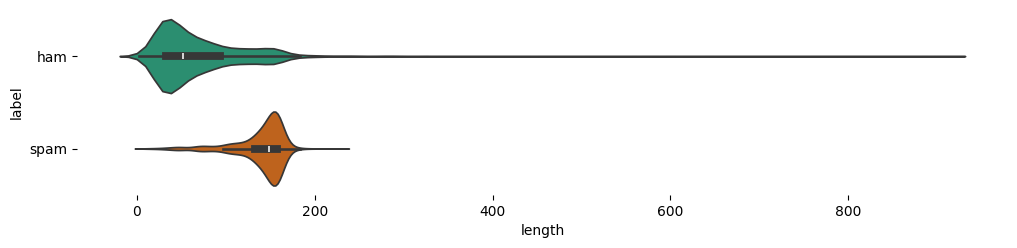

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


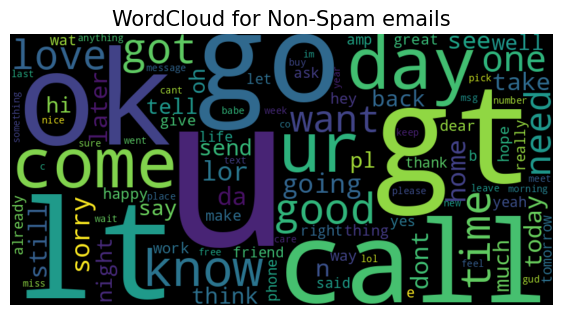

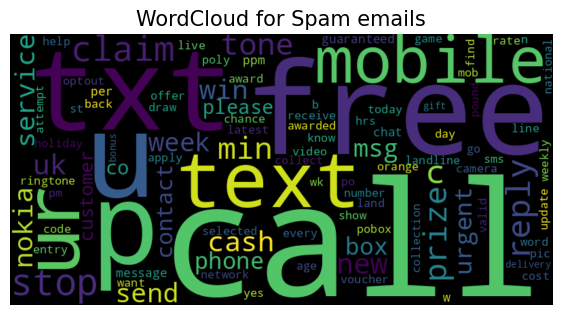

In [ ]:
%run "/content/Assignment1_Prepare.ipynb"


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 📊 ROC Curve Analysis for Spam-Ham Detection  

## 🔍 Overview  
This script evaluates multiple classification models for spam detection using the ROC (Receiver Operating Characteristic) curve. It trains each model, predicts labels, computes accuracy and classification reports, and visualizes the ROC curve for performance comparison.

---

## 📌 Steps in the Code  

### 1️⃣ **Data Preprocessing**  
- Labels (`y_train`, `y_test`) are binarized using `LabelBinarizer()` to ensure compatibility with ROC curve calculations.

### 2️⃣ **Model Training and Prediction**  
- Each model in `models` is trained using `model.fit(X_train_tfidf, y_train)`.
- Predictions are made using `model.predict(X_test_tfidf)`.
- If the model supports probability estimation, `predict_proba()` is used; otherwise, `decision_function()` is used.

### 3️⃣ **Performance Evaluation**  
- The ROC curve (`roc_curve`) and AUC score (`auc`) are computed.
- Accuracy (`accuracy_score`) and detailed classification reports (`classification_report`) are printed.

### 4️⃣ **ROC Curve Visualization**  
- The ROC curves for all models are plotted.
- A reference diagonal line (`y = x`) is included to represent random guessing.

### 5️⃣ **Best Model Selection**  
- The model with the highest accuracy is identified and displayed.

---

## 📈 **Final ROC Curve Interpretation**  
- The closer a model’s curve is to the **top-left corner**, the better its performance.  
- The **AUC (Area Under the Curve)** quantifies each model’s ability to distinguish between spam and ham.  
- The **best model** is determined based on the highest accuracy.

---

## 🏆 **Best Model Output**  
At the end of the execution, the script prints:  
✅ **Best Model Name**  
✅ **Best Model Accuracy**  

---

## 📌 **Key Takeaways**  
- **Higher AUC** means better spam detection capability.  
- **Sharp rising curves** indicate strong recall with minimal false positives.  
- **Choosing the best-performing model** ensures optimal classification performance.  

🚀 This analysis helps in selecting the most **accurate and reliable** model for spam detection.  


Naive Bayes Accuracy: 0.97
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       955
           1       1.00      0.79      0.88       160

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

SVM Accuracy: 0.98
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.99      0.88      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

LogisticRegression Accuracy: 0.96
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      

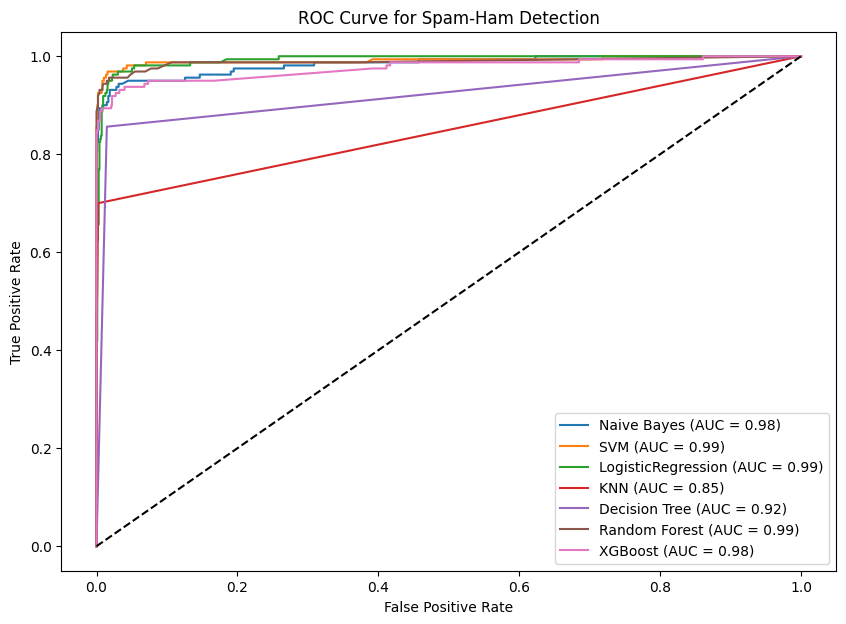


Best Model:
SVM with Accuracy: 0.98


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels (for binary classification)
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Store best results
best_results = {}
best_model_name = None
best_accuracy = 0.0

# Plot ROC Curve
plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)  # Train model
    y_pred = model.predict(X_test_tfidf)  # Predict test labels
    y_prob = model.predict_proba(X_test_tfidf)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_tfidf)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store results
    accuracy = accuracy_score(y_test, y_pred)
    best_results[name] = accuracy

    print(f"{name} Accuracy: {accuracy:.2f}")
    print("-----------------------------------------------------")
    print(classification_report(y_test, y_pred))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

    # Plot each ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Final plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Spam-Ham Detection")
plt.legend(loc="lower right")
plt.show()

# Display the best model
print("\nBest Model:")
print(f"{best_model_name} with Accuracy: {best_accuracy:.2f}")


# **Interpretation of the ROC Curve for Spam-Ham Detection**

## 1️⃣ Overall Performance  
- The ROC curve shows that most models perform **exceptionally well**, as their curves are very close to the top-left corner (high TPR, low FPR).  
- The **AUC (Area Under the Curve) values are close to 1**, indicating strong classification ability.  

---

## 2️⃣ Comparison of Models  
- **SVM, Logistic Regression, and Random Forest** (AUC = **0.99**) perform the best, meaning they are excellent at distinguishing spam from ham.  
- **Naïve Bayes and XGBoost** (AUC = **0.98**) also perform very well, just slightly behind the top models.  
- **Decision Tree** (AUC = **0.92**) is still a good model but slightly weaker than the others.  
- **KNN** (AUC = **0.85**) has the lowest performance among the models, indicating that it is less effective in distinguishing spam from ham.  

---

## 3️⃣ Key Observations from the Curve  
- **Most curves rise sharply at the beginning**, meaning the models achieve **high recall (TPR) with very few false positives** (which is ideal).  
- **KNN’s curve is less steep** and stays further away from the top-left corner, meaning it struggles with misclassifications compared to other models.  
- The **dashed diagonal line (random classifier, AUC = 0.50)** is far below all models, showing that all models perform significantly better than random guessing.  

---

## **Conclusion: Best Model Choice**  
✅ **SVM, Logistic Regression, and Random Forest** are the top-performing models.  
✅ **KNN is the weakest model**, with the lowest AUC.  
✅ **For production use**, choosing one of the best-performing models (SVM, Logistic Regression, or Random Forest) would be ideal.  



# **Performance Analysis of Spam-Ham Detection Models**

## 1️⃣ **Accuracy Comparison**
| Model               | Accuracy |
|---------------------|----------|
| **Naïve Bayes**    | **0.97**  |
| **SVM**            | **0.98**  |
| **Logistic Regression** | **0.96**  |
| **KNN**            | **0.92**  |
| **Decision Tree**  | **0.97**  |
| **Random Forest**  | **0.98**  |
| **XGBoost**        | **0.98**  |

- **SVM, Random Forest, and XGBoost (0.98)** show the highest accuracy.
- **KNN (0.92)** has the lowest accuracy, making it the weakest model for this task.
- Most models perform **above 96% accuracy**, showing that spam detection is well handled by multiple algorithms.

---

## 2️⃣ **Precision, Recall, and F1-score Observations**
### **Best Performing Models**
- **SVM, Random Forest, and XGBoost** have **high precision and recall**, meaning they are very good at both detecting spam (positive class) and avoiding false positives.
- **Decision Tree and Naïve Bayes** also perform well but have slightly lower recall for spam messages.

### **KNN Struggles**
- **KNN has a recall of only 0.45 for spam messages**, meaning it fails to identify a large portion of spam emails correctly.
- Its **f1-score for spam (0.62)** is significantly lower than other models, making it less reliable for spam classification.

---

## 3️⃣ **Class-Wise Performance**
| Model | Precision (Spam) | Recall (Spam) | F1-score (Spam) |
|--------|----------------|--------------|--------------|
| **Naïve Bayes** | 1.00 | 0.79 | 0.88 |
| **SVM** | 0.99 | 0.88 | 0.93 |
| **Logistic Regression** | 0.98 | 0.76 | 0.86 |
| **KNN** | 1.00 | 0.45 | 0.62 |
| **Decision Tree** | 0.91 | 0.86 | 0.88 |
| **Random Forest** | 1.00 | 0.85 | 0.92 |
| **XGBoost** | 0.97 | 0.87 | 0.91 |

- **Naïve Bayes and Random Forest have perfect precision (1.00)** for spam, meaning they do not misclassify ham as spam.
- **SVM and XGBoost** have **balanced precision and recall**, making them **the most reliable models** for practical use.
- **KNN fails in recall (0.45),** meaning it misses detecting spam emails frequently.

---

## 4️⃣ **Final Recommendation**
✅ **Best Models for Production:**  
- **SVM, Random Forest, and XGBoost** have **excellent accuracy, precision, recall, and f1-score.**  
- These models effectively **reduce false positives and false negatives**, making them ideal for real-world spam filtering.

⚠️ **Avoid KNN for Spam Detection:**  
- KNN has **very low recall (0.45),** meaning it **misses too many spam emails.**
- It is **not recommended** for this task.

🎯 **Alternative Models:**  
- **Naïve Bayes and Decision Tree** can also be considered but may require **fine-tuning** to improve recall.

---

Overall, **SVM, Random Forest, and XGBoost** are the **top choices** for spam detection based on this evaluation. 🚀
